### This code compares Baseband Catalog 1 to CHIME/FRB Catalog 1
### It forms the basis of Appendix D and provides evidence for a substantial scatter between SNR and fluence mentioned in Section 3 of Gupta el al. (2025)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
cat1 = pd.read_csv("files/chimefrbcutcat_94.csv")
cat2 = pd.read_csv('files/basecat1_catalog.csv')
cat1_idx = []
cat2_idx = []
for i in range(cat2.shape[0]):
    flag = np.where(cat1['tns_name'] == cat2['tns_name'][i])[0]
    if len(flag) != 0 and cat2['fluence'][i] > 0:
        cat1_idx.append(flag[0])
        cat2_idx.append(i)

print("Sample size = ", len(cat1['tns_name'][cat1_idx].values))
print("Repeaters in the sample")
print(cat1['repeater_name'][cat1_idx][cat1['repeater_name'][cat1_idx] != '-9999'])

Sample size =  94
Repeaters in the sample
113    FRB20190116B
118    FRB20190117A
161    FRB20190222A
Name: repeater_name, dtype: object


### Show how FRBs detected by the baseband system differ in statistics with the selection-correction sub-sample of Catalog 1
#### Note that for 2018/12, the CHIME/FRB system was operating for the whole month, whereas baseband started on 2018/12/09

In [8]:
count = 0
bins = 11
cat1_bin = np.zeros(bins)
cat2_bin = np.zeros(bins)
month = ['201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906', '201907']
m_count = 0
for i in range(len(cat1)):
    if cat1['tns_name'][i].find(month[m_count]) >= 0:
        cat1_bin[m_count] += 1
    else:
        m_count += 1
        if cat1['tns_name'][i].find(month[m_count]) >= 0:
            cat1_bin[m_count] += 1
    if i == cat1_idx[count]:
        cat2_bin[m_count] += 1
        if count+1 < len(cat1_idx):
            count += 1

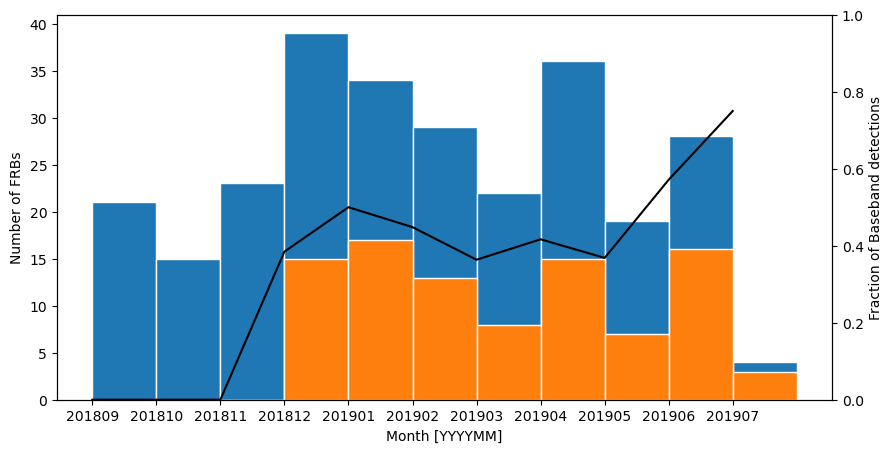

0.4753804876309413 Actual value is lower, see above Markdown


In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(month, cat1_bin, align='edge', width=1, edgecolor='white')
ax.bar(month, cat2_bin, align='edge', width=1, edgecolor='white')
ax.set_ylabel('Number of FRBs')
ax.set_xlabel('Month [YYYYMM]')

axp = ax.twinx()
axp.plot(month, cat2_bin/cat1_bin, color='black')
axp.set_ylabel('Fraction of Baseband detections')
axp.set_ylim([0,1])
plt.show()
print(np.average((cat2_bin/cat1_bin)[3:]), "Actual value is lower, see above Markdown")

### Check if there is a trend in SNR. There is nothing conclusive here.

C:\Users\Om\AppData\Local\Temp\ipykernel_23640\2203754909.py:13: RuntimeWarning: invalid value encountered in divide
  axp.plot(snr_bins[:-1]+np.diff(snr_bins)/2, cat2_snrhist/cat1_snrhist, color='k')


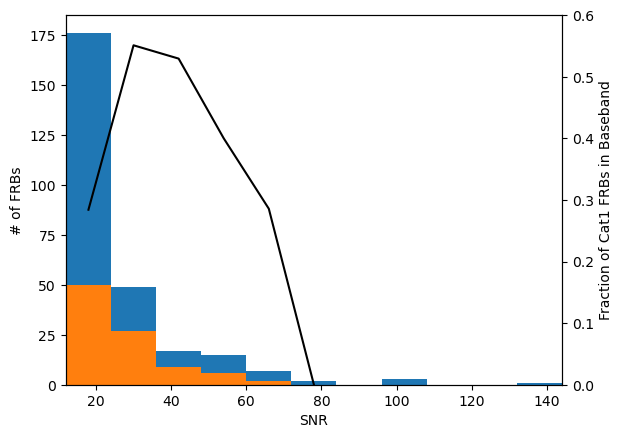

In [10]:
snr_bins = np.linspace(12,144,12)
cat1_snrhist,_ = np.histogram(cat1['bonsai_snr'], bins=snr_bins)
cat2_snrhist,_ = np.histogram(cat1['bonsai_snr'][cat1_idx], bins=snr_bins)

fig, ax = plt.subplots()
axp = ax.twinx()
ax.bar(snr_bins[:-1], cat1_snrhist, width=12, align='edge')
ax.bar(snr_bins[:-1], cat2_snrhist, width=12, align='edge')
ax.set_xlabel("SNR")
ax.set_ylabel("# of FRBs")
ax.set_xlim([12,144])

axp.plot(snr_bins[:-1]+np.diff(snr_bins)/2, cat2_snrhist/cat1_snrhist, color='k')
axp.set_ylim([0,0.6])
axp.set_ylabel("Fraction of Cat1 FRBs in Baseband")
plt.show()